TA4 - Grok and Bert - by Lennox Anderson and Vihaan Nama
Parts of this assignment were completed with the help of Perplexity AI

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("participants.csv")

Data Structure
The dataset contains information about 185 participants with 8 columns:
    user_code: Unique identifier for each participant (object type)
    gender: Participant's gender (object type)
    age_range: Age range of the participant (object type)
    city: City of residence (object type)
    country: Country of residence (object type)
    height: Participant's height in centimeters (float64)
    weight: Participant's weight in kilograms (float64)
    symptoms_onset: Date of symptom onset (object type)

Descriptive Statistics
For the numerical columns (height and weight):
Statistic	Height (cm)	Weight (kg)
Count	183	185
Mean	169.98	77.93
Std Dev	12.40	19.55
Min	132.08	43.50
25%	163.50	63.50
Median	168.00	74.34
75%	174.50	90.54
Max	250.00	154.22

Data Quality
Missing values:
    city: 12 missing
    country: 6 missing
    height: 2 missing
    symptoms_onset: 38 missing
Duplicates: 
    No duplicate rows were found in the dataset.

Variable Relationships
The correlation matrix shows:
    A weak positive correlation (0.227) between height and weight.

Gender Distribution:
    Female: 118
    Male: 67
    
Age Range Distribution:
    35-44: 56
    45-54: 51
    25-34: 46
    18-24: 16
    55-64: 9
    65-74: 7

In [3]:
print(df)

      user_code gender age_range           city        country  height  \
0    007b8190cf      m     25-34       Mandalay        Myanmar  170.18   
1    013f6d3e5b      f     18-24      São Paulo         Brazil  174.00   
2    01bad5a519      m     45-54  St Petersburg         Russia  178.00   
3    0210b20eea      f     25-34          Sochi         Russia  169.00   
4    024719e7da      f     45-54  St Petersburg         Russia  158.00   
..          ...    ...       ...            ...            ...     ...   
180  fd387f6269      f     35-44      Attleboro  United States  165.00   
181  fdc881a0a8      f     55-64         Moscow         Russia  160.00   
182  fde84801d8      f     45-54         Tambov         Russia  168.00   
183  fe5ca7e4ea      m     35-44  Dar es Salaam       Tanzania  168.00   
184  fe6c1b1349      f     25-34         Moscow         Russia  173.00   

      weight symptoms_onset  
0     96.162            NaN  
1     77.300      5/15/2020  
2     92.000       4/

In [10]:
#Dropped any rows with NaN values
df = df.dropna()

In [11]:
print(df)

      user_code gender age_range           city        country  height  \
1    013f6d3e5b      f     18-24      São Paulo         Brazil  174.00   
2    01bad5a519      m     45-54  St Petersburg         Russia  178.00   
3    0210b20eea      f     25-34          Sochi         Russia  169.00   
4    024719e7da      f     45-54  St Petersburg         Russia  158.00   
9    0bdfbddb2b      f     18-24       Teren'ga         Russia  159.00   
..          ...    ...       ...            ...            ...     ...   
178  f9edcb7056      f     65-74         Folsom  United States  154.94   
179  fcf3ea75b0      f     45-54         Moscow         Russia  168.00   
180  fd387f6269      f     35-44      Attleboro  United States  165.00   
182  fde84801d8      f     45-54         Tambov         Russia  168.00   
184  fe6c1b1349      f     25-34         Moscow         Russia  173.00   

      weight symptoms_onset  
1     77.300      5/15/2020  
2     92.000       4/5/2020  
3     60.000       5/

As we can see the number of rows from the original dataset reduced. This is because we dropped the NaN values. 

In [12]:
df_cleaned = df.drop_duplicates(subset=['user_code'], keep='first')

In [15]:
print(df_cleaned)

      user_code gender age_range           city        country  height  \
1    013f6d3e5b      f     18-24      São Paulo         Brazil  174.00   
2    01bad5a519      m     45-54  St Petersburg         Russia  178.00   
3    0210b20eea      f     25-34          Sochi         Russia  169.00   
4    024719e7da      f     45-54  St Petersburg         Russia  158.00   
9    0bdfbddb2b      f     18-24       Teren'ga         Russia  159.00   
..          ...    ...       ...            ...            ...     ...   
178  f9edcb7056      f     65-74         Folsom  United States  154.94   
179  fcf3ea75b0      f     45-54         Moscow         Russia  168.00   
180  fd387f6269      f     35-44      Attleboro  United States  165.00   
182  fde84801d8      f     45-54         Tambov         Russia  168.00   
184  fe6c1b1349      f     25-34         Moscow         Russia  173.00   

      weight symptoms_onset  
1     77.300      5/15/2020  
2     92.000       4/5/2020  
3     60.000       5/

As we can see there are no duplicate rows as it was tested based on customer ID - now we can drop customer ID

In [17]:
df_cleaned = df_cleaned.drop(columns = ['user_code'])
df_cleaned.head()

,gender,age_range,city,country,height,weight,symptoms_onset
1,f,18-24,São Paulo,Brazil,174.0,77.3,5/15/2020
2,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
3,f,25-34,Sochi,Russia,169.0,60.0,5/6/2020
4,f,45-54,St Petersburg,Russia,158.0,68.5,5/27/2020
9,f,18-24,Teren'ga,Russia,159.0,73.5,4/1/2020


In [21]:
df_cleaned["height_inches"] = df_cleaned["height"] / 2.54
df_cleaned["weight_lbs"] = df_cleaned["weight"] * 2.25

df_cleaned["BMI"] = df_cleaned["weight_lbs"] * 703 / (df_cleaned["height_inches"] * df_cleaned["height_inches"])

df_cleaned.head()

,gender,age_range,city,country,height,weight,symptoms_onset,height_inches,weight_lbs,BMI
1,f,18-24,São Paulo,Brazil,174.0,77.3,5/15/2020,68.503937,173.925,26.054712
2,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020,70.078740,207.000,29.631463
3,f,25-34,Sochi,Russia,169.0,60.0,5/6/2020,66.535433,135.000,21.437943
4,f,45-54,St Petersburg,Russia,158.0,68.5,5/27/2020,62.204724,154.125,28.001524
9,f,18-24,Teren'ga,Russia,159.0,73.5,4/1/2020,62.598425,165.375,29.668690


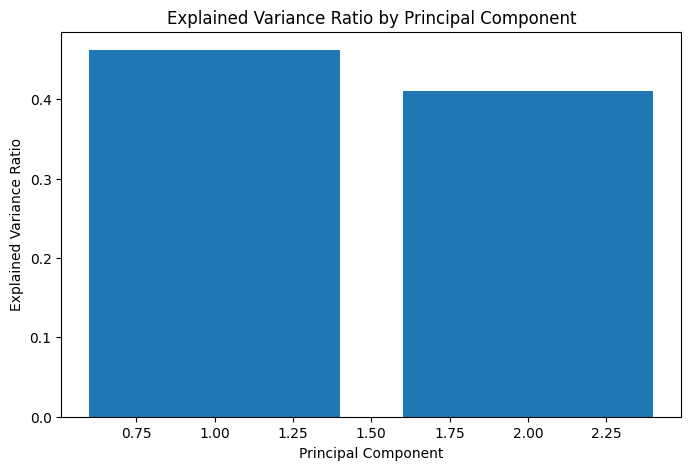

Cumulative explained variance ratio:
[0.4619571  0.87195861]
    user_code gender age_range           city country  height  weight  \
0  013f6d3e5b      f     18-24      São Paulo  Brazil   174.0    77.3   
1  01bad5a519      m     45-54  St Petersburg  Russia   178.0    92.0   
2  0210b20eea      f     25-34          Sochi  Russia   169.0    60.0   
3  024719e7da      f     45-54  St Petersburg  Russia   158.0    68.5   
4  0bdfbddb2b      f     18-24       Teren'ga  Russia   159.0    73.5   

  symptoms_onset       PC1       PC2  
0      5/15/2020 -0.183240 -0.269376  
1       4/5/2020  0.554901  1.472755  
2       5/6/2020 -1.248597 -0.691822  
3      5/27/2020 -0.214308 -1.281366  
4       4/1/2020  0.129976 -1.188955  


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Convert gender Column to a numerical one by using label encoder

encoder = LabelEncoder()
df_cleaned['gender'] = encoder.fit_transform(df_cleaned['gender'])


# Select numerical columns and drop missing values
numerical_columns = ['height', 'weight', 'BMI', 'gender']
X = df_cleaned[numerical_columns].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:")
print(np.cumsum(explained_variance_ratio))

# Add PCA results to the DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_with_pca = pd.concat([df.reset_index(drop=True), df_pca], axis=1)

# Display the first few rows of the new DataFrame with PCA components
print(df_with_pca.head())

Data quality assessment is a crucial process in data management and analysis. It involves evaluating various aspects of data to ensure its reliability, accuracy, and usefulness. The key components of data quality assessment:
    Data Profiling
    Data profiling is the process of examining, analyzing, and creating useful summaries of data. It helps in understanding the structure, content, and quality of the dataset.
    In our dataset:
    We have 185 participants with 8 columns of information.
    The data types include object (for categorical data) and float64 (for numerical data).
    Some basic statistics were provided for height and weight


Data Completeness
    Data completeness refers to the extent to which all required data is available in the dataset.
    In our dataset:
    There are missing values in several columns:
    city: 12 missing
    country: 6 missing
    height: 2 missing
    symptoms_onset: 38 missing (20.5% of the data)
    The high percentage of missing data in the symptoms_onset column could affect analyses related to the timing of symptom onset.


Data Accuracy
    Data accuracy is the degree to which data correctly represents the real-world entity or event being described.
    In our dataset:
    Most height and weight values seem reasonable for a human population.
    However, there are potential outliers that need investigation:
    Maximum height of 250 cm (about 8'2")
    Some extreme weight values


Data Consistency
    Data consistency ensures that data is uniform and compatible across all systems and applications.
    In our dataset:
    Height is consistently recorded in centimeters.
    Weight is consistently recorded in kilograms.
    Age is recorded in ranges rather than specific ages, which is consistent but may limit certain analyses.


Data Integrity
    Data integrity refers to the overall completeness, accuracy, and consistency of data.
    In our dataset:
    No duplicate rows were found, which is a positive sign for data integrity
    The use of a unique identifier (user_code) for each participant helps maintain integrity.
    The consistency in units (cm for height, kg for weight) contributes to data integrity.


Data Lineage and Provenance
    Source: The dataset originates from the Welltory HRV-COVID19 project, hosted on GitHub

    Project Purpose: This project aims to collect and analyze data related to heart rate variability (HRV) and COVID-19 symptoms, providing insights into the potential relationship between HRV metrics and COVID-19 progression

    Data Collection Method:
    The data was collected through the Welltory app, which measures HRV using smartphone cameras.
    Participants voluntarily contributed their data and reported their COVID-19 symptoms.
    Timeframe: Based on the 'symptoms_onset' column, data collection appears to have occurred primarily in 2020, coinciding with the early stages of the COVID-19 pandemic.
    Data Structure: The dataset includes demographic information (gender, age range, location), physical attributes (height, weight), and the date of symptom onset for COVID-19.

    Data Transformations:
    The original dataset likely included more detailed HRV metrics, which are not present in our current CSV file.
    Age has been categorized into ranges, possibly for privacy reasons.

    Data Sharing: The data has been made publicly available on GitHub, promoting open science and collaborative research on COVID-19.

    Ethical Considerations:
    User codes are used instead of names, indicating efforts to maintain participant anonymity.
    The project likely obtained consent from participants to share their data for research purposes.
    Limitations:
    The dataset we're working with appears to be a subset of the full dataset, focusing on demographic and symptom onset information rather than 
    HRV metrics.
    Some data quality issues (missing values, potential outliers) suggest that this might be raw, unprocessed data.

    Version Control: Being hosted on GitHub, the dataset may have multiple versions or updates. It would be beneficial to check the repository for any changelog or version information.
    By understanding this provenance, we can better contextualize the data and its potential uses:
    The data is directly relevant to COVID-19 research, particularly in exploring potential physiological indicators of infection.
    The international scope of the data (multiple countries represented) allows for cross-cultural comparisons.
    The timeframe of data collection (early 2020) represents the initial wave of the pandemic, which may have unique characteristics compared to later stages.
    
    For future analysis, it would be valuable to:
    Cross-reference this demographic data with the HRV metrics available in the full dataset.
    Consider the self-reported nature of the symptom onset data when drawing conclusions.
    Investigate any data processing or cleaning steps that may have been applied before the data was made public.
    This improved understanding of the data's origins and purpose enhances its credibility and provides crucial context for any analyses or conclusions drawn from it.